In [1]:
# Steps to download kaggle datasets in google colab

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"monoarulislamamit","key":"90e4f85b1958e448af93ca011a05343e"}'}

In [3]:
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dogs-breed-dataset 
!kaggle datasets download -d yapwh1208/dogs-breed-dataset

100% 628M/629M [00:17<00:00, 40.9MB/s]
100% 629M/629M [00:17<00:00, 38.4MB/s]


In [5]:
# Unzip the zip-file
!unzip dogs-breed-dataset.zip

Archive:  dogs-breed-dataset.zip
  inflating: dog_v1/french_bulldog/0200259a-2722-4576-86fb-6ead7393d8a0.jpg  
  inflating: dog_v1/french_bulldog/0c28471d0832854c0206dc3d4a563e93.jpg  
  inflating: dog_v1/french_bulldog/100e702566c23d7f711b7d69f415c735.jpg  
  inflating: dog_v1/french_bulldog/14747-2116.jpg  
  inflating: dog_v1/french_bulldog/14959-1992.jpg  
  inflating: dog_v1/french_bulldog/15072-4692.jpg  
  inflating: dog_v1/french_bulldog/15491-2365.jpg  
  inflating: dog_v1/french_bulldog/21767-8375.jpg  
  inflating: dog_v1/french_bulldog/21768-1518.jpg  
  inflating: dog_v1/french_bulldog/22310-5589.jpg  
  inflating: dog_v1/french_bulldog/2c8df8a81189a6f22c928dafd6266cee.jpg  
  inflating: dog_v1/french_bulldog/33-1024x1024.jpg  
  inflating: dog_v1/french_bulldog/36d03c999a9aa228dfdec3e21d9569bc.jpg  
  inflating: dog_v1/french_bulldog/37041515_2569746716384667_2807571631214428160_n.jpg  
  inflating: dog_v1/french_bulldog/38d460cecae7c959ecca7d3d2c38b396.jpg  
  inflating:

In [6]:
import os

# walk through dog-breed directory and list number of files

for dirpath, dirnames, filenames in os.walk("dog_v1"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 5 directories and 0 images in 'dog_v1
There are 0 directories and 208 images in 'dog_v1/french_bulldog
There are 0 directories and 182 images in 'dog_v1/poodle
There are 0 directories and 247 images in 'dog_v1/german_shepherd
There are 0 directories and 180 images in 'dog_v1/yorkshire_terrier
There are 0 directories and 213 images in 'dog_v1/golden_retriever


In [7]:
# Import libraries
import numpy as np
import pandas as pd
import pathlib
import PIL
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random

import tensorflow as tf
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.regularizers import L2,L1,L1L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, Rescaling, BatchNormalization
from tensorflow.keras.models import Sequential

In [8]:
# Creat a list of class_names from the subdirectories.

data_dir = pathlib.Path("dog_v1")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)

# Get the number of classes
num_classes = len(class_names)
print(f"There are {num_classes} dog breeds in the dataset")

['french_bulldog' 'german_shepherd' 'golden_retriever' 'poodle'
 'yorkshire_terrier']
There are 5 dog breeds in the dataset


In [9]:
# Let's visualize images by creating a helper function

def view_random_image(target_dir, target_class):

  """
  Returns image when given target image location.
  """
  # Setup the target directory ( we'll view images from here)
  target_folder = target_dir +  target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['423730.jpg']
Image shape: (1536, 2048, 3)


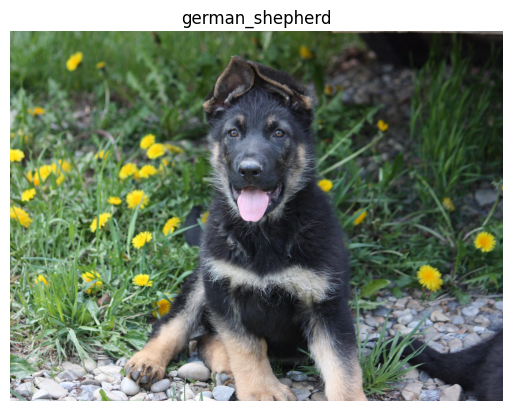

In [10]:
# Generate a random image of german_shepherd.
img = view_random_image(target_dir = "dog_v1/",
                  target_class = "german_shepherd")

['french-bulldog-857897.jpg']
Image shape: (1500, 1125, 3)


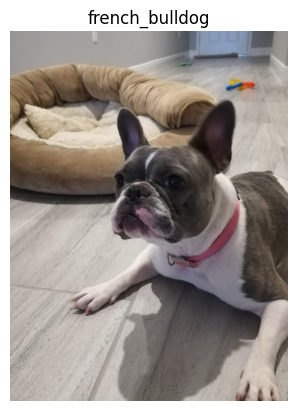

In [11]:
# Generate a random image of french_bulldog.
img = view_random_image(target_dir = "dog_v1/",
                  target_class = "french_bulldog")

In [12]:
# Setup batch_size, img_height and img_width 
batch_size = 32
img_height = 224
img_width = 224

In [13]:
# Create training data
train_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                         validation_split = 0.2,
                                                         subset = 'training',
                                                         seed = 42,
                                                         label_mode = "categorical",
                                                         image_size = (img_height, img_width),
                                                         batch_size = batch_size)

Found 1030 files belonging to 5 classes.
Using 824 files for training.


In [14]:
# Create validation data
validation_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                         validation_split = 0.2,
                                                         subset = 'validation',
                                                         seed = 42,
                                                         label_mode = "categorical",
                                                         image_size = (img_height, img_width),
                                                         batch_size = batch_size)

Found 1030 files belonging to 5 classes.
Using 206 files for validation.


In [15]:
# plot the validation and training curves separately
# Another helper function to visualize loss and accuracy curves

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.figure()
  plt.plot(epochs,loss, label ="training_loss")
  plt.plot(epochs,val_loss, label ="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label ="training_accuracy")
  plt.plot(epochs, val_accuracy, label ="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

### Custom Models

In [16]:
# model with no regularizer.
# base model thus overfitting, lr = 0.001

tf.random.set_seed(42)

model_1 = Sequential([
    # Preprocess image on the go. 
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # First convolutional layer
    Conv2D(filters = 16,
           kernel_size = 3,
           strides = (1,1),
           activation = "relu",
           padding = "valid",
           input_shape = (224,224,3)),
    # First MaxPooling layer.
    MaxPool2D(pool_size = 2,
              padding = "valid"),
    Conv2D(32,3,activation = "relu"),
    MaxPool2D(pool_size = 2,
              padding = "same"),
    Conv2D(64,3,activation = "relu"),
    MaxPool2D(pool_size = 2,
              padding = "same"),
    # Extracted features are converted into one-dimensional vector in the Flatten layer.
    Flatten(),
    # Fully connected layer
    Dense(128, activation = "leaky_relu"),
    Dense(64,activation = "leaky_relu"),
    # Output layer
    Dense(num_classes,activation = "softmax")
])

# Compile the model 
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# Fit the model 
history_1 = model_1.fit(train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)) 


Epoch 1/20
26/26 [==============================] - 40s 834ms/step - loss: 1.8072 - accuracy: 0.2269 - val_loss: 1.6025 - val_accuracy: 0.2282
Epoch 2/20
26/26 [==============================] - 24s 751ms/step - loss: 1.5798 - accuracy: 0.2731 - val_loss: 1.5822 - val_accuracy: 0.2039
Epoch 3/20
26/26 [==============================] - 25s 756ms/step - loss: 1.4073 - accuracy: 0.4114 - val_loss: 1.4953 - val_accuracy: 0.3447
Epoch 4/20
26/26 [==============================] - 25s 737ms/step - loss: 1.1679 - accuracy: 0.5449 - val_loss: 1.5102 - val_accuracy: 0.3786
Epoch 5/20
26/26 [==============================] - 24s 751ms/step - loss: 0.9228 - accuracy: 0.6408 - val_loss: 1.6916 - val_accuracy: 0.3592
Epoch 6/20
26/26 [==============================] - 25s 721ms/step - loss: 0.5617 - accuracy: 0.7888 - val_loss: 2.1856 - val_accuracy: 0.3495
Epoch 7/20
26/26 [==============================] - 25s 725ms/step - loss: 0.2798 - accuracy: 0.9248 - val_loss: 2.5397 - val_accuracy: 0.3252

In [17]:
# Gives us the summary of our model. Also shows the number of trainable and non-trainable parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        1

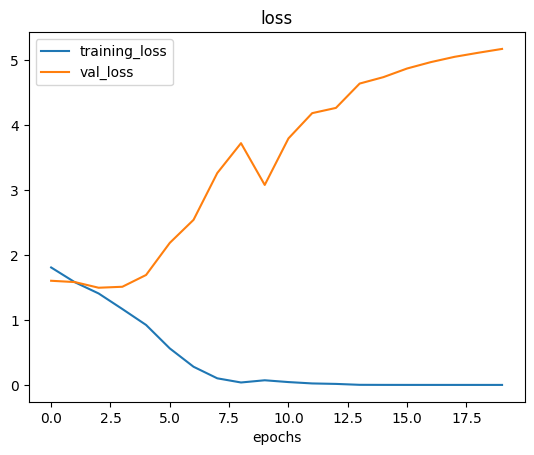

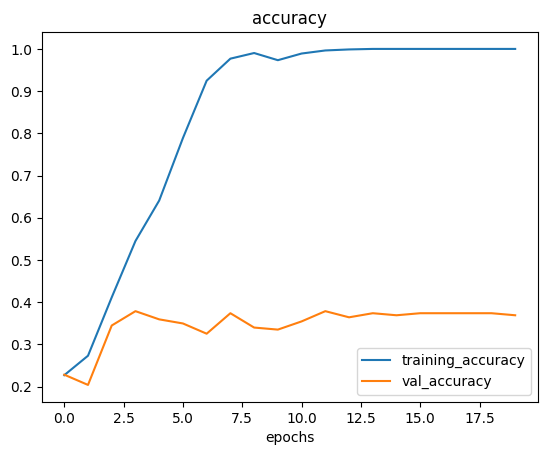

In [18]:
# Plot the loss and accuracy curves
plot_loss_curves(history_1)

In [19]:
# Base ANN model
# Create this model to compare trainable parameters number with respect to base CNN model

tf.random.set_seed(42)

model_ann = Sequential([
    Flatten(input_shape = (224,224,3)),
    BatchNormalization(),
    Dense(128,activation = "relu"),
    BatchNormalization(),
    Dense(64,activation = "relu"),
    BatchNormalization(),
    Dense(num_classes,activation = "softmax")
])

model_ann.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history_ann = model_ann.fit(train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)) 

Epoch 1/20
26/26 [==============================] - 27s 686ms/step - loss: 1.8997 - accuracy: 0.2791 - val_loss: 7.0420 - val_accuracy: 0.2864
Epoch 2/20
26/26 [==============================] - 24s 705ms/step - loss: 1.3631 - accuracy: 0.4478 - val_loss: 3.9855 - val_accuracy: 0.2670
Epoch 3/20
26/26 [==============================] - 24s 751ms/step - loss: 1.1852 - accuracy: 0.5279 - val_loss: 2.2902 - val_accuracy: 0.2524
Epoch 4/20
26/26 [==============================] - 24s 727ms/step - loss: 1.0339 - accuracy: 0.6177 - val_loss: 1.9670 - val_accuracy: 0.2816
Epoch 5/20
26/26 [==============================] - 24s 706ms/step - loss: 0.8676 - accuracy: 0.7209 - val_loss: 1.8033 - val_accuracy: 0.3010
Epoch 6/20
26/26 [==============================] - 24s 743ms/step - loss: 0.7385 - accuracy: 0.7682 - val_loss: 1.6846 - val_accuracy: 0.3204
Epoch 7/20
26/26 [==============================] - 24s 741ms/step - loss: 0.5265 - accuracy: 0.8738 - val_loss: 1.6238 - val_accuracy: 0.3155

In [20]:
model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 batch_normalization (BatchN  (None, 150528)           602112    
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)              

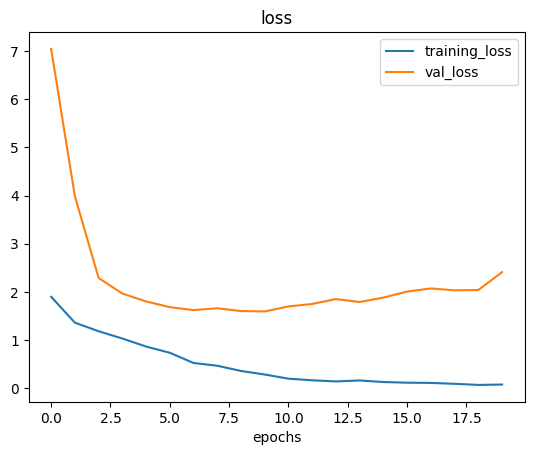

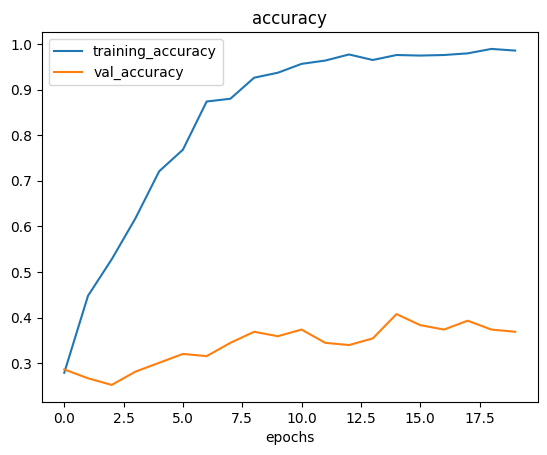

In [21]:
plot_loss_curves(history_ann)

In [22]:
from tensorflow.keras import layers

# Perform data augmentation
# Don't use vertical flip because generally dog images are not captured in this way.
tf.random.set_seed(42)
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)), 
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1)
  ]
)

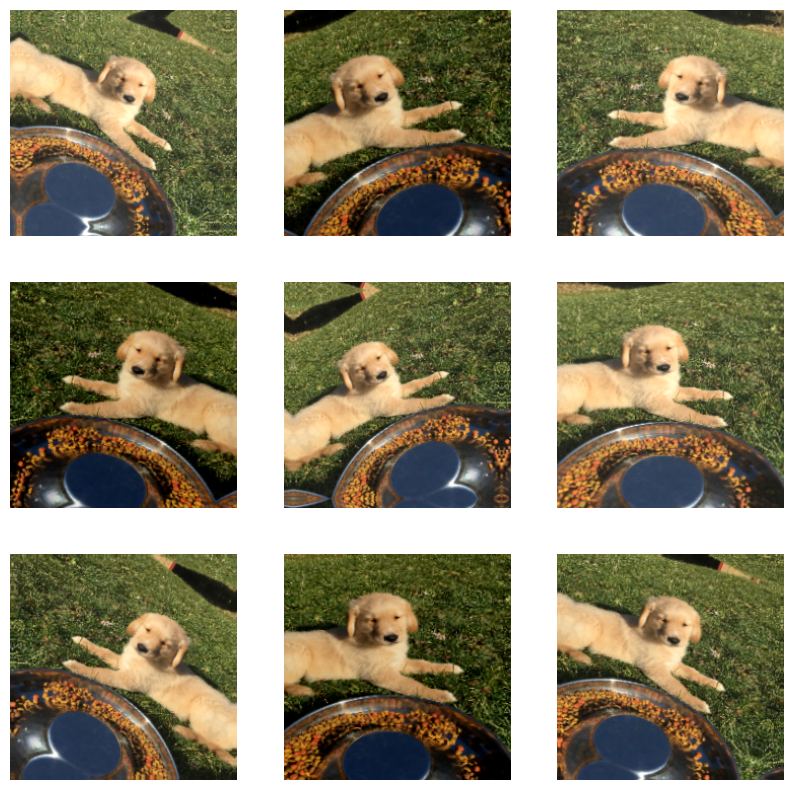

In [23]:
# plot some augmented images

plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
# Add regularization techniques to reduce overfitting (drop out + Ridge regression)

tf.random.set_seed(42)

model_regularized = Sequential([
    data_augmentation,
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(filters = 16,
           kernel_size = 3,
           strides = (1,1),
           activation = "relu",
           padding = "valid",
           input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2,
              padding = "valid"),
    Conv2D(32,3,activation = "relu",kernel_regularizer = L2(l2= 0.01)),
    MaxPool2D(pool_size = 2,
              padding = "same"),
    Conv2D(64,3,activation = "relu",kernel_regularizer = L2(l2= 0.01)),
    MaxPool2D(pool_size = 2,
              padding = "same"),
    Flatten(),
    Dense(128, activation = "leaky_relu",kernel_regularizer = L2(l2= 0.01)),
    Dropout(0.3),
    Dense(64,activation = "leaky_relu",kernel_regularizer = L2(l2= 0.01)),
    Dropout(0.3),
    Dense(num_classes,activation = "softmax")
])

# Compile the model 
model_regularized.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# Fit the model 
history_regularized = model_regularized.fit(train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)) 
 

Epoch 1/20
26/26 [==============================] - 28s 716ms/step - loss: 4.0713 - accuracy: 0.2536 - val_loss: 3.1703 - val_accuracy: 0.1796
Epoch 2/20
26/26 [==============================] - 25s 776ms/step - loss: 2.8270 - accuracy: 0.2342 - val_loss: 2.5989 - val_accuracy: 0.1845
Epoch 3/20
26/26 [==============================] - 25s 764ms/step - loss: 2.4202 - accuracy: 0.2512 - val_loss: 2.3147 - val_accuracy: 0.1845
Epoch 4/20
26/26 [==============================] - 25s 747ms/step - loss: 2.2353 - accuracy: 0.2900 - val_loss: 2.1987 - val_accuracy: 0.2913
Epoch 5/20
26/26 [==============================] - 24s 747ms/step - loss: 2.1154 - accuracy: 0.3095 - val_loss: 2.0372 - val_accuracy: 0.3447
Epoch 6/20
26/26 [==============================] - 25s 753ms/step - loss: 2.0159 - accuracy: 0.3398 - val_loss: 2.0262 - val_accuracy: 0.2136
Epoch 7/20
26/26 [==============================] - 25s 760ms/step - loss: 1.9587 - accuracy: 0.3386 - val_loss: 1.8711 - val_accuracy: 0.3301

In [25]:
model_regularized.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                  

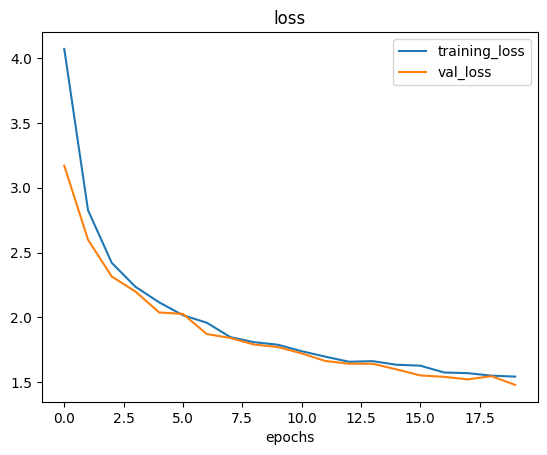

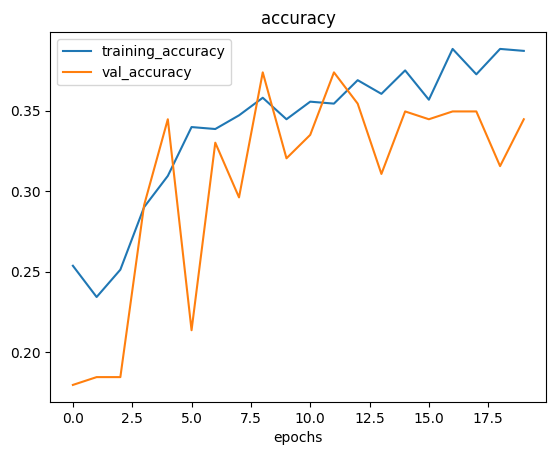

In [26]:
plot_loss_curves(model_regularized.history)

In [27]:
# Add regularization techniques to reduce overfitting (drop out + Ridge regression)

tf.random.set_seed(42)

# Clone regularized model
model_regularized_2 = tf.keras.models.clone_model(model_regularized)

# Compile the model 
model_regularized_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# Fit the model 
history_regularized_2 = model_regularized_2.fit(train_data,
                        epochs = 35,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)) 

Epoch 1/35
26/26 [==============================] - 27s 702ms/step - loss: 4.1725 - accuracy: 0.2015 - val_loss: 3.2114 - val_accuracy: 0.1748
Epoch 2/35
26/26 [==============================] - 25s 763ms/step - loss: 2.8820 - accuracy: 0.2476 - val_loss: 2.6220 - val_accuracy: 0.1845
Epoch 3/35
26/26 [==============================] - 25s 762ms/step - loss: 2.4664 - accuracy: 0.2451 - val_loss: 2.3477 - val_accuracy: 0.1845
Epoch 4/35
26/26 [==============================] - 24s 731ms/step - loss: 2.2561 - accuracy: 0.2536 - val_loss: 2.1874 - val_accuracy: 0.1845
Epoch 5/35
26/26 [==============================] - 24s 740ms/step - loss: 2.1230 - accuracy: 0.2573 - val_loss: 2.0806 - val_accuracy: 0.1845
Epoch 6/35
26/26 [==============================] - 24s 706ms/step - loss: 2.0319 - accuracy: 0.2561 - val_loss: 1.9990 - val_accuracy: 0.1845
Epoch 7/35
26/26 [==============================] - 24s 713ms/step - loss: 1.9511 - accuracy: 0.2816 - val_loss: 1.9294 - val_accuracy: 0.2573

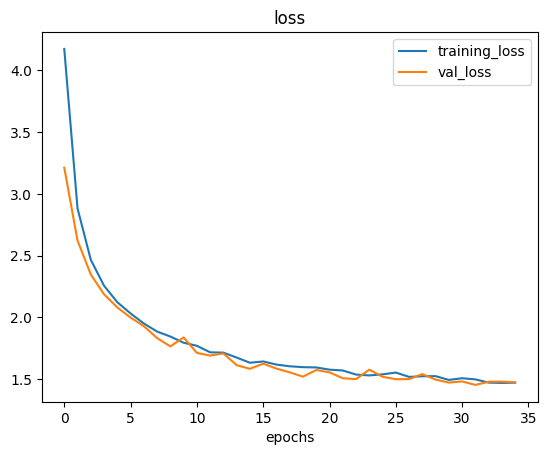

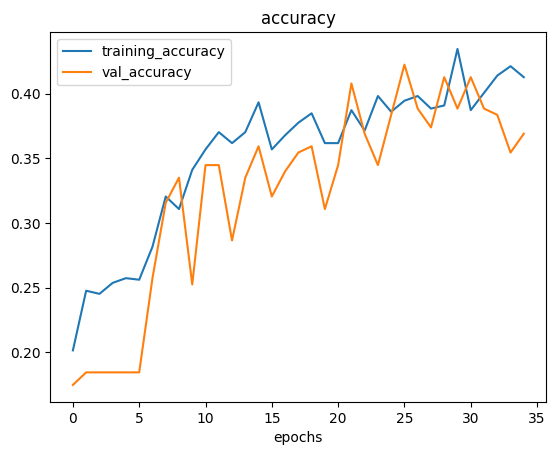

In [28]:
plot_loss_curves(history_regularized_2)

### Apply Transfer Learning (method 1)

1. Feature Extraction approach

In [29]:
# Import pretrained VGG16 model
from keras.applications.vgg16 import VGG16

In [30]:
# Create an instance of VGG16 model
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (img_height,img_width,3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [31]:
# Summary of the model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
# Create a model
tf.random.set_seed(42)
model_tl_feat_ext = Sequential([
    conv_base,
    Flatten(),
    BatchNormalization(),
    Dense(256,activation = "relu"),
    BatchNormalization(),
    Dense(5,activation = "softmax")
])

In [33]:
model_tl_feat_ext.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 5)                

In [34]:
# Freezing the training in convolutional layers part and thus reduce the number of trainable parameters.
conv_base.trainable = False

In [35]:
model_tl_feat_ext.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 5)                

In [36]:
model_tl_feat_ext.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])
history_tl_feat_ext = model_tl_feat_ext.fit(train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)) 

Epoch 1/20
26/26 [==============================] - 37s 1s/step - loss: 0.8579 - accuracy: 0.7694 - val_loss: 2.3365 - val_accuracy: 0.8544
Epoch 2/20
26/26 [==============================] - 26s 816ms/step - loss: 0.0729 - accuracy: 0.9806 - val_loss: 0.8969 - val_accuracy: 0.8981
Epoch 3/20
26/26 [==============================] - 26s 779ms/step - loss: 0.0166 - accuracy: 0.9988 - val_loss: 0.6222 - val_accuracy: 0.9078
Epoch 4/20
26/26 [==============================] - 26s 785ms/step - loss: 0.0201 - accuracy: 0.9951 - val_loss: 0.4991 - val_accuracy: 0.9126
Epoch 5/20
26/26 [==============================] - 26s 782ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4309 - val_accuracy: 0.9126
Epoch 6/20
26/26 [==============================] - 26s 816ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3909 - val_accuracy: 0.9126
Epoch 7/20
26/26 [==============================] - 26s 813ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3649 - val_accuracy: 0.9126
Ep

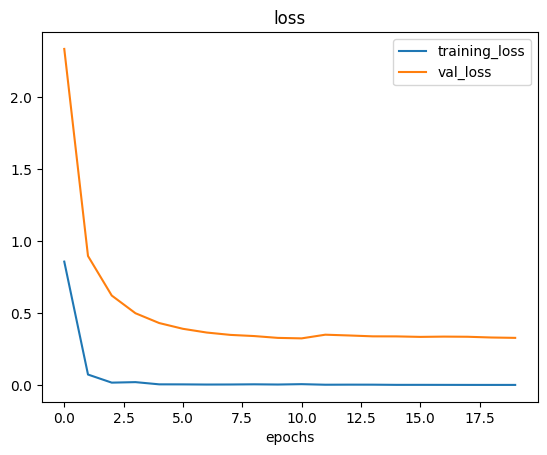

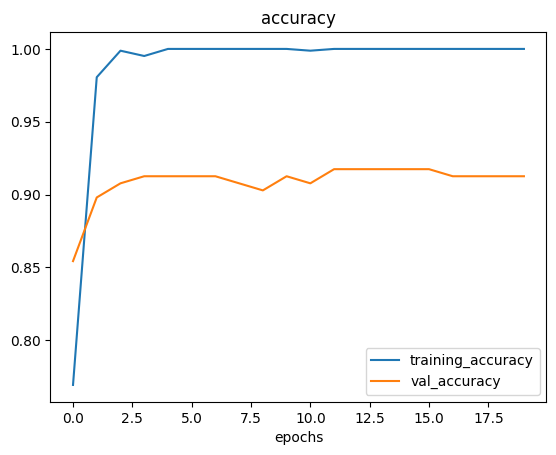

In [37]:
plot_loss_curves(history_tl_feat_ext)

### Apply Transfer learning (method 2)
2. Fine-Tuning Approach

In [38]:
# set to trainable to True to manipulate one convolutional layer later
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  # only manipulate the 5th convolutional layer
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable == True:
    layer.traiable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
# transfer learning - fine tuning

tf.random.set_seed(42)
model_tl_fine_tune = Sequential([
    conv_base,
    Flatten(),
    BatchNormalization(),
    Dense(256,activation = "relu"),
    BatchNormalization(),
    Dense(5,activation = "softmax")
])

In [41]:
model_tl_fine_tune.compile(loss = "categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                           metrics = ["accuracy"])

history_tl_fine_tune = model_tl_fine_tune.fit(train_data,
                                       epochs = 20,
                                       steps_per_epoch = len(train_data),
                                       validation_data = validation_data,
                                       validation_steps = len(validation_data)) 

Epoch 1/20
26/26 [==============================] - 31s 799ms/step - loss: 1.5753 - accuracy: 0.4854 - val_loss: 50.2602 - val_accuracy: 0.2184
Epoch 2/20
26/26 [==============================] - 32s 990ms/step - loss: 0.8354 - accuracy: 0.6917 - val_loss: 17.7412 - val_accuracy: 0.2233
Epoch 3/20
26/26 [==============================] - 27s 830ms/step - loss: 0.4800 - accuracy: 0.8277 - val_loss: 1.9858 - val_accuracy: 0.5388
Epoch 4/20
26/26 [==============================] - 26s 821ms/step - loss: 0.3173 - accuracy: 0.8896 - val_loss: 25.0582 - val_accuracy: 0.2233
Epoch 5/20
26/26 [==============================] - 26s 800ms/step - loss: 0.2781 - accuracy: 0.9005 - val_loss: 27.7688 - val_accuracy: 0.2816
Epoch 6/20
26/26 [==============================] - 26s 792ms/step - loss: 0.2175 - accuracy: 0.9248 - val_loss: 20.6406 - val_accuracy: 0.2670
Epoch 7/20
26/26 [==============================] - 26s 790ms/step - loss: 0.1814 - accuracy: 0.9357 - val_loss: 16.4659 - val_accuracy: 

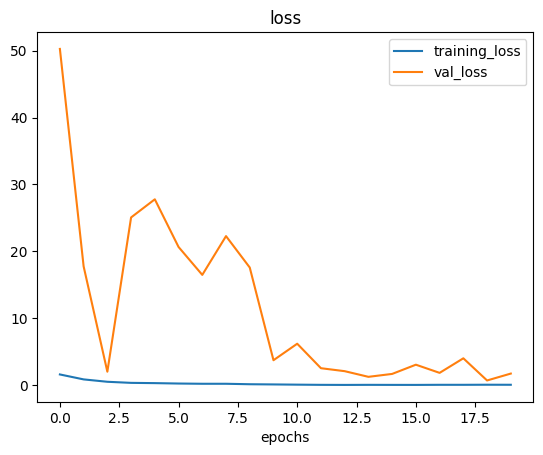

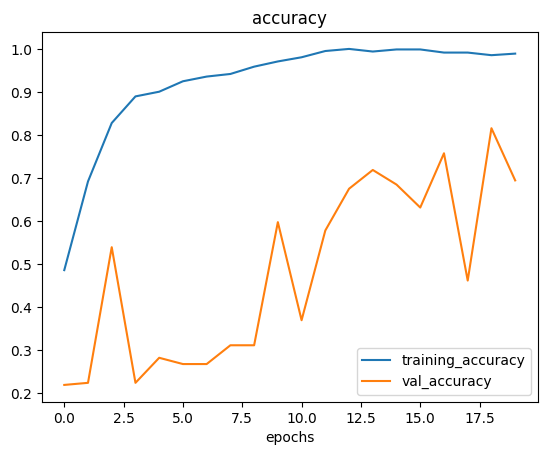

In [42]:
plot_loss_curves(history_tl_fine_tune)

In [43]:
# Predict dog breed with a helper function
def get_dog_breed(test_url, file_name, model):

  """
  Shows the class_name along with the confidence of being that class.
  """
  test_path = tf.keras.utils.get_file(fname = file_name, origin=test_url)
  img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width))
  
  plt.imshow(img)
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  #print(predictions)
  score = tf.nn.softmax(predictions[0])
  #print(score)
  plt.title(class_names[np.argmax(score)])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

  return 100 * np.max(score)

1/1 [==============================] - 0s 284ms/step
This image most likely belongs to golden_retriever with a 40.41 percent confidence.


40.41411876678467

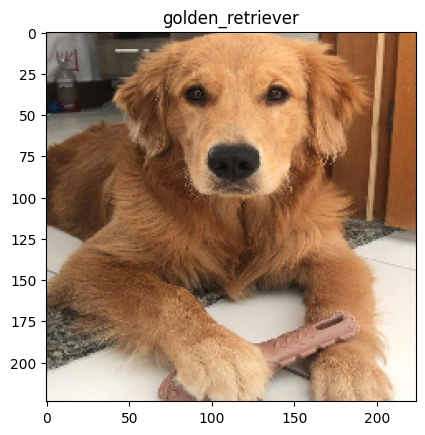

In [44]:
# Test with a unseen golden_retriever dog image
get_dog_breed("https://i.pinimg.com/originals/10/d7/75/10d775b05c5c4251f1ea02dab4cda35c.jpg", 'golden_retriever',model_1)

1/1 [==============================] - 1s 819ms/step
This image most likely belongs to yorkshire_terrier with a 40.46 percent confidence.


40.46091139316559

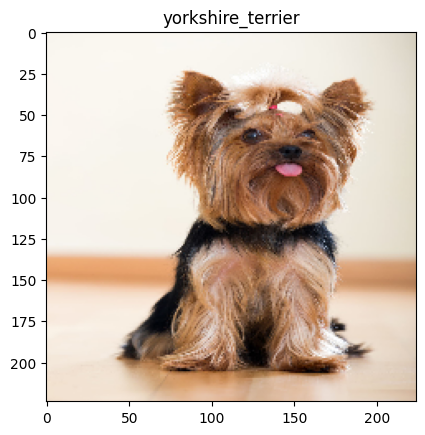

In [45]:
# Test with a unseen yorkshire_terrier dog image
get_dog_breed("http://t3.gstatic.com/licensed-image?q=tbn:ANd9GcQQjmLKGZ5Trho15yAt5uooU62i-f4C0ObcpZg7d8GxAAbmrWOCW432s9X8XjtZQxMxD92zDf4mbfmZo4Q", 'yorkshire_terrier',model_tl_fine_tune)

In [46]:
# Another configuration of our predict dog breed with a helper function
def get_dog_breed(test_url, file_name, model):

  """
  Shows the class_name along with the confidence of being that class.
  """
  test_path = tf.keras.utils.get_file(fname = file_name, origin=test_url)
  img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width))
  
  plt.imshow(img)
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  title = plt.title(class_names[np.argmax(score)]).get_text()


  return (100 * np.max(score), title)

1/1 [==============================] - 0s 52ms/step
                Models  Confidence_score             Title
0              model_1         40.414119  golden_retriever
1            model_ann         27.648565  golden_retriever
2    model_regularized         23.949094  golden_retriever
3  model_regularized_2         23.588867  golden_retriever
4    model_tl_feat_ext         40.460968  golden_retriever
5   model_tl_fine_tune         40.459082  golden_retriever


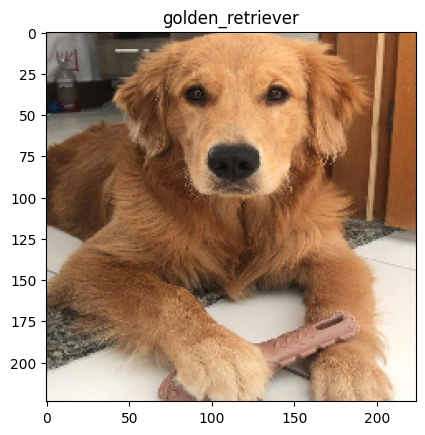

In [54]:
# Show each model confidence on a single image

models = [model_1, model_ann, model_regularized, model_regularized_2 , model_tl_feat_ext, model_tl_fine_tune]
model_names = ["model_1", "model_ann", "model_regularized", "model_regularized_2" , "model_tl_feat_ext", "model_tl_fine_tune"]
confidence_scores = []
titles = []

for model_ in models:
  score, title = get_dog_breed("https://i.pinimg.com/originals/10/d7/75/10d775b05c5c4251f1ea02dab4cda35c.jpg", 'golden_retriever' ,model_)
  confidence_scores.append(score)
  titles.append(title)

print(pd.DataFrame({"Models":model_names, "Confidence_score":confidence_scores, "Title":titles}))

In [48]:
# Save the best model
model_tl_feat_ext.save("Feature_extraction_model")

In [49]:
# load the best model
loaded_model = tf.keras.models.load_model("Feature_extraction_model")

In [50]:
# Check to see if both the loaded and original model are same or not. 
loaded_model.summary() == model_tl_feat_ext.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 5)                

True